In [5]:
from generate_flightpath import generate_flightpath
import pandas as pd

performance_data=pd.read_pickle('aircraft_performance_data_table.pkl')
flightpath = generate_flightpath('C130',  performance_data=performance_data)


[262133.68460722]
[236185.75755056]
[210944.80159959]
[186390.91979619]
[162504.73381079]
[139267.37927164]
[116660.5001247]
[163538.78517111]
[148990.80488245]
[134671.01282071]
[120575.85916568]
[106701.84829012]
[93045.53816601]
[79603.53976306]
[66372.51644042]
[53349.18333253]
[40540.56345611]
[27927.96678091]
[15508.38276171]
[3278.84820612]


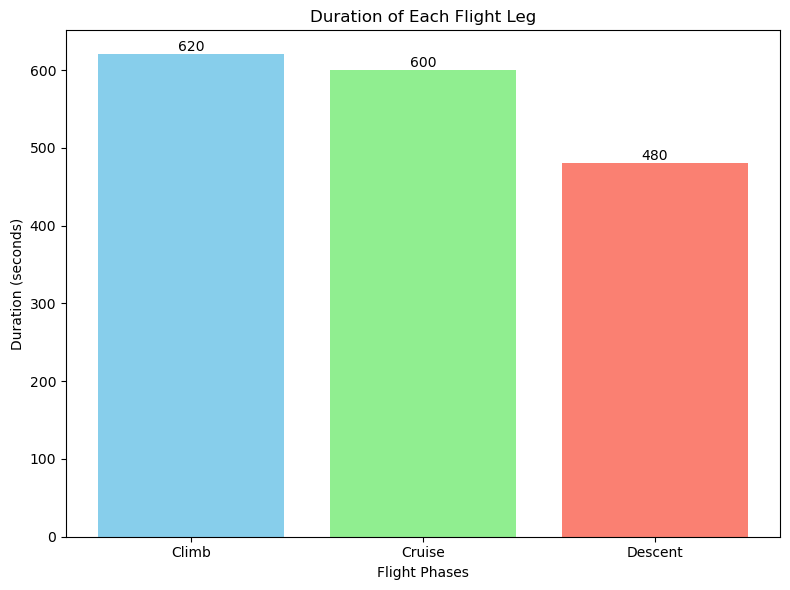

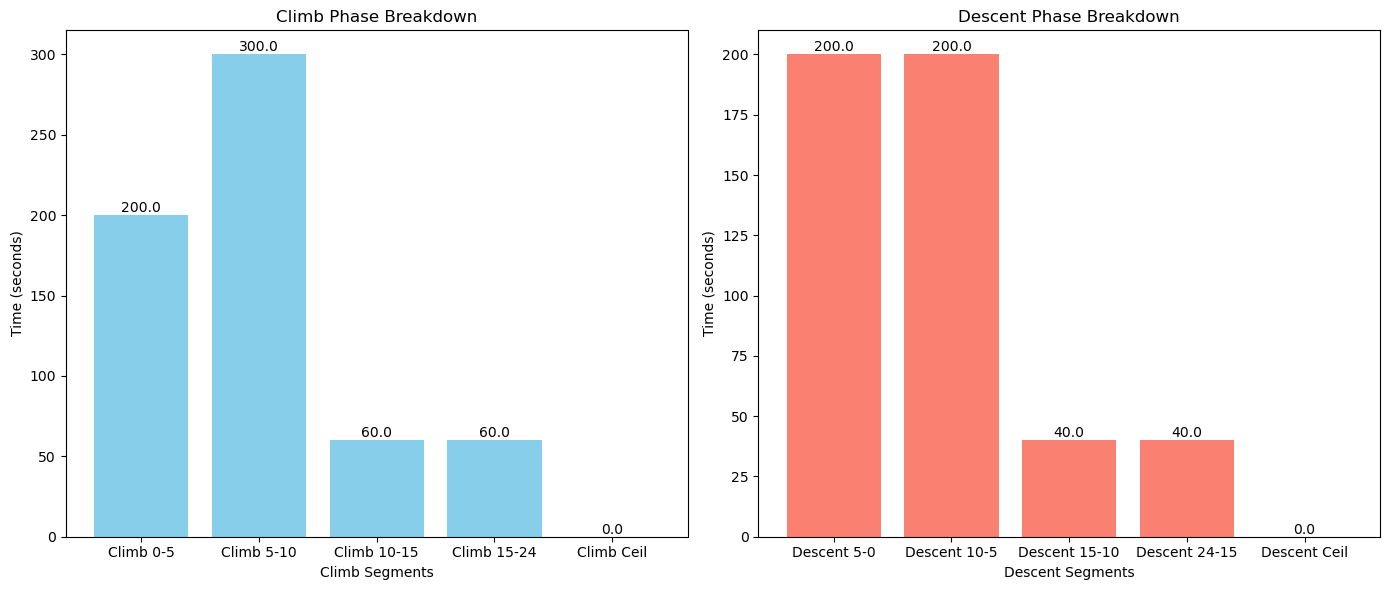

In [6]:

import matplotlib.pyplot as plt

# Sum durations from the flightpath dictionary for each phase
climb_time = (flightpath['climb'].get('t_climb_0_5', 0) +
              flightpath['climb'].get('t_climb_5_10', 0) +
              flightpath['climb'].get('t_climb_10_15', 0) +
              flightpath['climb'].get('t_climb_15_24', 0) +
              flightpath['climb'].get('t_climb_ceil', 0))

descent_time = (flightpath['descent'].get('t_descent_5_0', 0) +
                flightpath['descent'].get('t_descent_10_5', 0) +
                flightpath['descent'].get('t_descent_15_10', 0) +
                flightpath['descent'].get('t_descent_24_15', 0) +
                flightpath['descent'].get('t_descent_ceil', 0))

cruise_time = flightpath['cruise'].get('t_cruise', 0)

# Prepare data for the barchart
phases = ['Climb', 'Cruise', 'Descent']
durations = [climb_time, cruise_time, descent_time]

# Optionally convert seconds to minutes (or leave in seconds)
# durations = [t / 60.0 for t in durations]

plt.figure(figsize=(8, 6))
bars = plt.bar(phases, durations, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Flight Phases')
plt.ylabel('Duration (seconds)')
plt.title('Duration of Each Flight Leg')

# Annotate bars with duration values
for bar, duration in zip(bars, durations):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{duration:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
# Break down the climb phases
climb_labels = ['Climb 0-5', 'Climb 5-10', 'Climb 10-15', 'Climb 15-24', 'Climb Ceil']
climb_times = [
    flightpath['climb'].get('t_climb_0_5', 0),
    flightpath['climb'].get('t_climb_5_10', 0),
    flightpath['climb'].get('t_climb_10_15', 0),
    flightpath['climb'].get('t_climb_15_24', 0),
    flightpath['climb'].get('t_climb_ceil', 0)
]

# Break down the descent phases
descent_labels = ['Descent 5-0', 'Descent 10-5', 'Descent 15-10', 'Descent 24-15', 'Descent Ceil']
descent_times = [
    flightpath['descent'].get('t_descent_5_0', 0),
    flightpath['descent'].get('t_descent_10_5', 0),
    flightpath['descent'].get('t_descent_15_10', 0),
    flightpath['descent'].get('t_descent_24_15', 0),
    flightpath['descent'].get('t_descent_ceil', 0)
]

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Climb segments chart
plt.subplot(1, 2, 1)
bars_climb = plt.bar(climb_labels, climb_times, color='skyblue')
plt.xlabel('Climb Segments')
plt.ylabel('Time (seconds)')
plt.title('Climb Phase Breakdown')
for bar, t in zip(bars_climb, climb_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{t:.1f}', ha='center', va='bottom')

# Descent segments chart
plt.subplot(1, 2, 2)
bars_descent = plt.bar(descent_labels, descent_times, color='salmon')
plt.xlabel('Descent Segments')
plt.ylabel('Time (seconds)')
plt.title('Descent Phase Breakdown')
for bar, t in zip(bars_descent, descent_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{t:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

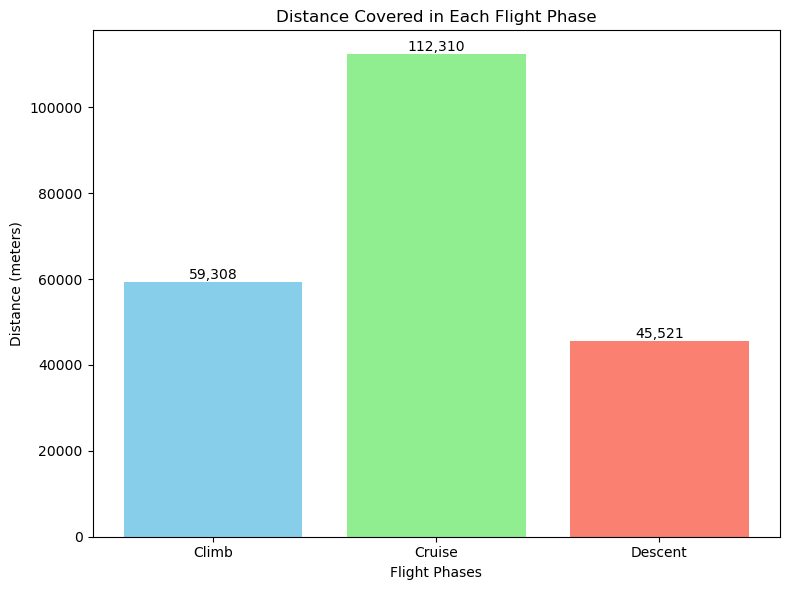

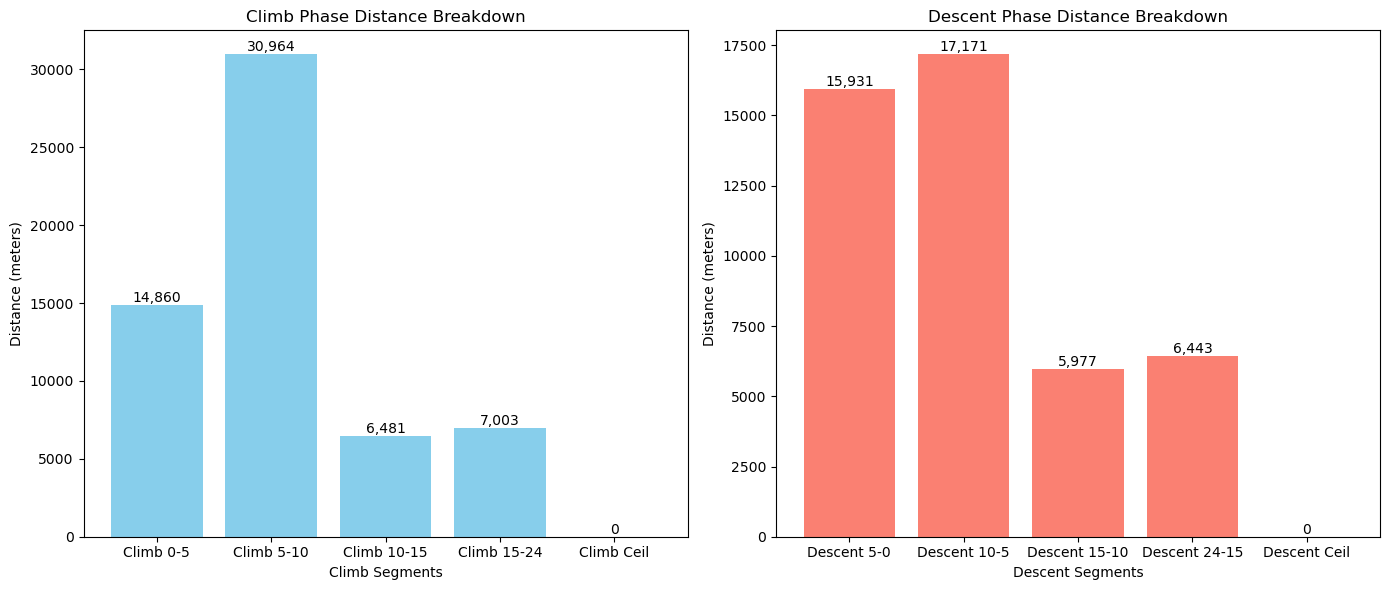

In [7]:
import numpy as np

import matplotlib.pyplot as plt

# Overall phase distances (in meters)
climb_distance = (np.atleast_1d(flightpath['climb'].get('s_climb_0_5', 0))[0] +
                  np.atleast_1d(flightpath['climb'].get('s_climb_5_10', 0))[0] +
                  np.atleast_1d(flightpath['climb'].get('s_climb_10_15', 0))[0] +
                  np.atleast_1d(flightpath['climb'].get('s_climb_15_24', 0))[0] +
                  np.atleast_1d(flightpath['climb'].get('s_climb_ceil', 0))[0])

cruise_distance = np.atleast_1d(flightpath['cruise'].get('s_cruise', 0))[0]

descent_distance = (np.atleast_1d(flightpath['descent'].get('s_descent_5_0', 0))[0] +
                    np.atleast_1d(flightpath['descent'].get('s_descent_10_5', 0))[0] +
                    np.atleast_1d(flightpath['descent'].get('s_descent_15_10', 0))[0] +
                    np.atleast_1d(flightpath['descent'].get('s_descent_24_15', 0))[0] +
                    np.atleast_1d(flightpath['descent'].get('s_descent_ceil', 0))[0])

phases = ['Climb', 'Cruise', 'Descent']
distances = [climb_distance, cruise_distance, descent_distance]

plt.figure(figsize=(8, 6))
overall_bars = plt.bar(phases, distances, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Flight Phases')
plt.ylabel('Distance (meters)')
plt.title('Distance Covered in Each Flight Phase')

# Annotate overall bars with distance values
for bar, dist in zip(overall_bars, distances):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{dist:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Breakdown of distances for each segment

# For Climb Phase
climb_keys = ['s_climb_0_5', 's_climb_5_10', 's_climb_10_15', 's_climb_15_24', 's_climb_ceil']
climb_distances = []
for key in climb_keys:
    value = flightpath['climb'].get(key, np.array([0]))
    # value is expected to be a numpy array; extract its first element if so
    if isinstance(value, np.ndarray):
        climb_distances.append(value[0])
    else:
        climb_distances.append(value)

# For Descent Phase
descent_keys = ['s_descent_5_0', 's_descent_10_5', 's_descent_15_10', 's_descent_24_15', 's_descent_ceil']
descent_distances = []
for key in descent_keys:
    value = flightpath['descent'].get(key, np.array([0]))
    if isinstance(value, np.ndarray):
        descent_distances.append(value[0])
    else:
        descent_distances.append(value)

plt.figure(figsize=(14, 6))

# Climb segments chart
plt.subplot(1, 2, 1)
bars_climb = plt.bar(climb_labels, climb_distances, color='skyblue')
plt.xlabel('Climb Segments')
plt.ylabel('Distance (meters)')
plt.title('Climb Phase Distance Breakdown')
for bar, d in zip(bars_climb, climb_distances):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{d:,.0f}', ha='center', va='bottom')

# Descent segments chart
plt.subplot(1, 2, 2)
bars_descent = plt.bar(descent_labels, descent_distances, color='salmon')
plt.xlabel('Descent Segments')
plt.ylabel('Distance (meters)')
plt.title('Descent Phase Distance Breakdown')
for bar, d in zip(bars_descent, descent_distances):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{d:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

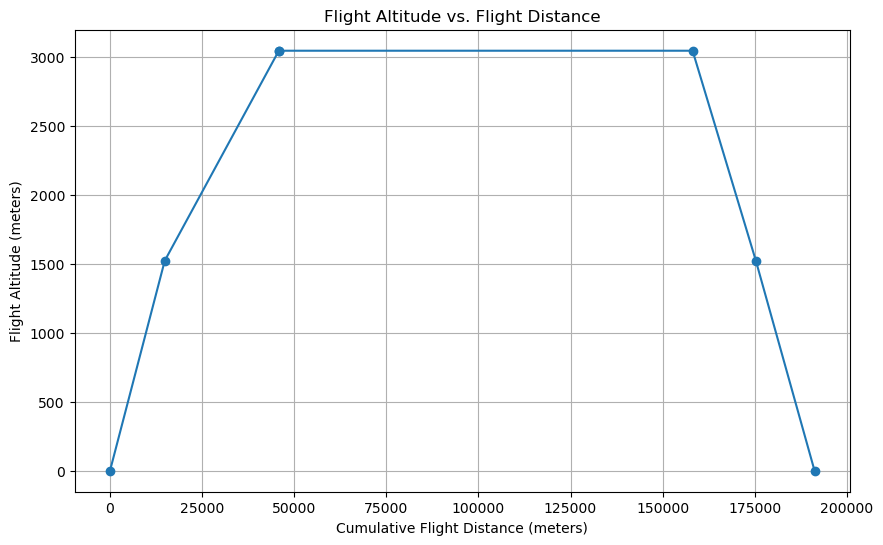

In [8]:
# Create cumulative distance and altitude arrays for the entire flight path

# For climb, extract distances and altitudes.
# s_climb_0_5 and s_climb_5_10 are stored as numpy arrays.
s_climb_0_5 = flightpath['climb'].get('s_climb_0_5', np.array([0]))[0]
s_climb_5_10 = flightpath['climb'].get('s_climb_5_10', np.array([0]))[0]
s_climb_10_15 = flightpath['climb'].get('s_climb_10_15', np.array([0]))[0]
s_climb_15_24 = flightpath['climb'].get('s_climb_15_24', np.array([0]))[0]
s_climb_ceil = flightpath['climb'].get('s_climb_ceil', np.array([0]))[0]
# End altitudes for each climb segment.
h_climb_0_5_end = flightpath['climb'].get('h_climb_0_5_end', 0)
h_climb_5_10_end = flightpath['climb'].get('h_climb_5_10_end', 0)
h_climb_10_15_end = flightpath['climb'].get('h_climb_10_15_end', 0)
h_climb_15_24_end = flightpath['climb'].get('h_climb_15_24_end', 0)
h_climb_ceil_end = flightpath['climb'].get('h_climb_ceil_end', 0)

# For cruise phase.
s_cruise = flightpath['cruise'].get('s_cruise', np.array([0]))[0]
# Use cruise altitude provided or fallback to last climb altitude.
h_cruise = flightpath['cruise'].get('alt_cruise', h_climb_5_10_end)

# For descent, we assume the descent is split into two segments:
# First descent: from cruise altitude down to an intermediate altitude.
# Second descent: from the intermediate altitude down to runway (0).
s_descent_10_5 = flightpath['descent'].get('s_descent_10_5', np.array([0]))[0]
s_descent_5_0 = flightpath['descent'].get('s_descent_5_0', np.array([0]))[0]
h_descent_10_5_end = flightpath['descent'].get('h_descent_10_5_end', 0)  # expected to be intermediate altitude (e.g. 1524)
h_descent_5_0_end = flightpath['descent'].get('h_descent_5_0_end', 0)    # expected to be 0

# Build cumulative distance and altitude lists.
# Starting at runway: (distance, altitude) = (0, 0)
distances_list = [0]
altitudes_list = [0]

# Climb phase:
# First climb segment (0-5):
cum_distance = distances_list[-1] + s_climb_0_5
distances_list.append(cum_distance)
altitudes_list.append(h_climb_0_5_end)
# Second climb segment (5-10):
cum_distance += s_climb_5_10
distances_list.append(cum_distance)
altitudes_list.append(h_climb_5_10_end)

# Cruise phase:
# Start cruise point (same as climb end)
distances_list.append(cum_distance)
altitudes_list.append(h_cruise)
# End cruise point:
cum_distance += s_cruise
distances_list.append(cum_distance)
altitudes_list.append(h_cruise)

# Descent phase:
# First descent segment: from cruise altitude to intermediate altitude.
cum_distance += s_descent_10_5
distances_list.append(cum_distance)
altitudes_list.append(h_descent_10_5_end)
# Second descent segment: from intermediate altitude to runway.
cum_distance += s_descent_5_0
distances_list.append(cum_distance)
altitudes_list.append(h_descent_5_0_end)

# Plot the altitude profile vs. cumulative flight distance.
plt.figure(figsize=(10, 6))
plt.plot(distances_list, altitudes_list, marker='o', linestyle='-')
plt.xlabel('Cumulative Flight Distance (meters)')
plt.ylabel('Flight Altitude (meters)')
plt.title('Flight Altitude vs. Flight Distance')
plt.grid(True)
plt.show()